- reference: https://jendrzejewski.synqs.org/post/2021-plotting-in-python/

# 1. Quantum harmonic oscillator

1. We will work our way through quantum harmonic oscillator for which the potential is:
$$ V(x) = \frac{m\omega^2}{2}x^2 $$ 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

Text(0, 0.5, 'Potential $V(x)')

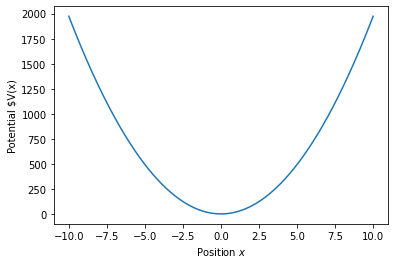

In [3]:
### Plot the harmonic potential

# 1. Parameters for the harmonic potential
m = 1 
omega = 2 * np.pi
hbar = 1 

# 2. Parameters of the grid
n_grid = 1001
xmin = -10
xmax = 10

xs_lst = np.linspace(xmin, xmax, n_grid)  # #a vector spanning from -10 to 10 with 1001 grid points
potentials_lst = m * np.power(omega, 2) / 2 * np.power(xs_lst, 2)

# 3. Plot
f, ax = plt.subplots()
ax.plot(xs_lst, potentials_lst)
ax.set_xlabel("Position $x$")
ax.set_ylabel("Potential $V(x)")

# 2. Numerical diagonalization (数值对角化)

1. While the potential is nice to look at, we would actually like to use python to do some more powerful stuff than simple plots. One of them is the `numerical diagonialization` of the problem.

## 2.1. Kinetic energy
1. We first have to `build the matrix that represents the kinetic energy`.
2. The `second order derivative` as:
$$ f^{''}(x) = \frac{f(x+dx) - 2f(x) + f(x-dx)}{dx^2} $$
3. Kinetic Energy:
$$  $$

In [4]:
# 1. resolution of the grid = 0.02
dx = np.diff(xs_lst).mean()

dia = -2*np.ones(n_grid)
offdia = np.ones(n_grid - 1)
    # np.diag(offdia, 1)  : 首列加一列 (全为0)
    # np.diag(offdia, -1) : 首行加一行 (全为0)
d2grid = np.mat(np.diag(dia,0) + np.diag(offdia,-1) + np.diag(offdia,1))/dx**2

# 2. Avoid strage things at the edge of the grid
d2grid[0, :] = 0
d2grid[n_grid-1,:] = 0

# 3. Calculate the `Kinetic energy`
Ekin = -hbar**2 / (2*m) * d2grid

Ekin

matrix([[    0.,     0.,     0., ...,     0.,     0.,     0.],
        [-1250.,  2500., -1250., ...,     0.,     0.,     0.],
        [    0., -1250.,  2500., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,  2500., -1250.,     0.],
        [    0.,     0.,     0., ..., -1250.,  2500., -1250.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]])

# 3. Potential energy

In [5]:
# potential energy as matrix Epot

In [6]:
Epot = np.mat(np.diag(potentials_lst, 0))
Epot

matrix([[1973.92088022,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        , 1966.03309238,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        , 1958.16109591, ...,    0.        ,
            0.        ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        , ..., 1958.16109591,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
         1966.03309238,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        , 1973.92088022]])

# 4. Diagonalization
1. We can now put them together as:



In [7]:
# 1. combine to Hamiltonian, diagonalize and plot the lowest 30 energy eigenvalues
H =  Ekin + Epot

# 2. diagonalization
    # w: 本征值
    # v: 本征向量
w, v = LA.eig(H)

# 3. sort it such that things look nice later
sort_indexs_lst = np.argsort(w)
eig_vecs_lst = v[:, sort_indexs_lst]
eig_vals_lst = w[sort_indexs_lst]

## 4.1. Time to plot up the `eigenvalues`

Text(0.5, 0, 'index $n$')

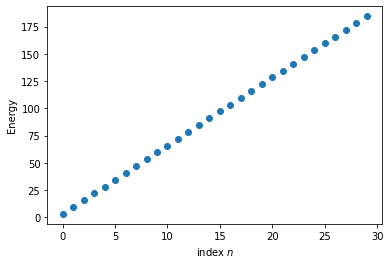

In [8]:
f, ax = plt.subplots()
ax.plot(eig_vals_lst[0:30],'o')
ax.set_ylabel('Energy')
ax.set_xlabel('index $n$')

## 4.2. and now some eigenfunctions

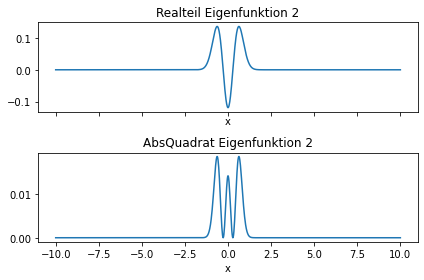

In [13]:
n = 2
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(xs_lst, np.real(eig_vecs_lst[:,n]))
ax1.set(title='Realteil Eigenfunktion %d'%(n),xlabel='x')

ax2.plot(xs_lst, np.power(np.abs(eig_vecs_lst[:,n]), 2))
ax2.set(title='AbsQuadrat Eigenfunktion %d'%(n),xlabel='x')

fig.tight_layout()